# Analysis of multiple repertoires

In this notebook we perform analysis of multiple BCR repertoires, fetched according to `/data/sources/immune-repertoires-dash/config.yml`. We call this multi-sample analysis and results from multi-sample analysis are used and displayed in the `immune-repertoires-dashboard`. We also may leverage immunarch in this notebook to provide some single-sample analysis results.

The requirement of a separate notebook stemms from the required R environment to run this analysis.

In [1]:
require("immunarch")

Loading required package: immunarch

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: dtplyr

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: patchwork



In [2]:
# Utils
save_plot_to_png = function(ggplot, fp) {
    png(filename=fp, width=1200, height=600)
    ggplot
    print(ggplot)
    dev.off()   
}

In [3]:
config = yaml::read_yaml("/data/sources/immune-repertoires-dash/config.yml")
samples = names(config$samples)
# multisample_analysis_dir = config$multisample_analysis$path
# print(paste0("Multisample analysis path: ", multisample_analysis_dir))

Warning message in readLines(file):
“incomplete final line found on '/data/sources/immune-repertoires-dash/config.yml'”


In [4]:
paths = c()

for (sample in samples) {
    rep_path = paste0(
        config$samples[[sample]]$sample_path,
        "/clones/",
        sample,
        "_novj_with_clones.tsv"
    )
    paths = c(paths, rep_path)
}

print(paths)

[1] "/data/samples/AIRR-Seq/OURS/S3987Nr1/S3987Nr1-PBMC1_heavy/clones/S3987Nr1-PBMC1_heavy_novj_with_clones.tsv"
[2] "/data/samples/AIRR-Seq/OURS/S3987Nr1/S3987Nr1-PBMC1_light/clones/S3987Nr1-PBMC1_light_novj_with_clones.tsv"
[3] "/data/samples/AIRR-Seq/OURS/S3987Nr2/S3987Nr2-PBMC1_heavy/clones/S3987Nr2-PBMC1_heavy_novj_with_clones.tsv"
[4] "/data/samples/AIRR-Seq/OURS/S3987Nr2/S3987Nr2-PBMC1_light/clones/S3987Nr2-PBMC1_light_novj_with_clones.tsv"
[5] "/data/samples/AIRR-Seq/OURS/S5205Nr1/S5205Nr1-N2_IgG1Fc_H/clones/S5205Nr1-N2_IgG1Fc_H_novj_with_clones.tsv"
[6] "/data/samples/AIRR-Seq/OURS/S5205Nr1/S5205Nr1-P1_IgG1Fc_H/clones/S5205Nr1-P1_IgG1Fc_H_novj_with_clones.tsv"
[7] "/data/samples/AIRR-Seq/OURS/S5205Nr1/S5205Nr1-P2_IgG1Fc_H/clones/S5205Nr1-P2_IgG1Fc_H_novj_with_clones.tsv"
[8] "/data/samples/AIRR-Seq/OURS/S5205Nr1/S5205Nr1-P2_PBMC_H/clones/S5205Nr1-P2_PBMC_H_novj_with_clones.tsv"    
[9] "/data/samples/AIRR-Seq/OURS/S5205Nr1/S5205Nr1-P2_PBMC_L/clones/S5205Nr1-P2_PBMC_L_novj_with

In [5]:
repertoires = repLoad(.path = paths)


== Step 1/3: loading repertoire files... ==


Processing "<initial>" ...

  -- [1/9] Parsing "/data/samples/AIRR-Seq/OURS/S3987Nr1/S3987Nr1-PBMC1_heavy/clones/S3987Nr1-PBMC1_heavy_novj_with_clones.tsv" -- 
airr

  -- [2/9] Parsing "/data/samples/AIRR-Seq/OURS/S3987Nr1/S3987Nr1-PBMC1_light/clones/S3987Nr1-PBMC1_light_novj_with_clones.tsv" -- 
airr

  -- [3/9] Parsing "/data/samples/AIRR-Seq/OURS/S3987Nr2/S3987Nr2-PBMC1_heavy/clones/S3987Nr2-PBMC1_heavy_novj_with_clones.tsv" -- 
airr

  -- [4/9] Parsing "/data/samples/AIRR-Seq/OURS/S3987Nr2/S3987Nr2-PBMC1_light/clones/S3987Nr2-PBMC1_light_novj_with_clones.tsv" -- 
airr

  -- [5/9] Parsing "/data/samples/AIRR-Seq/OURS/S5205Nr1/S5205Nr1-N2_IgG1Fc_H/clones/S5205Nr1-N2_IgG1Fc_H_novj_with_clones.tsv" -- 
airr

  -- [6/9] Parsing "/data/samples/AIRR-Seq/OURS/S5205Nr1/S5205Nr1-P1_IgG1Fc_H/clones/S5205Nr1-P1_IgG1Fc_H_novj_with_clones.tsv" -- 
airr

  -- [7/9] Parsing "/data/samples/AIRR-Seq/OURS/S5205Nr1/S5205Nr1-P2_IgG1Fc_H/clones/S5205Nr1-P2_

Exploratory analysis

In [6]:
options(repr.plot.width=15, repr.plot.height=8)  # Good size for ggplot2 in jupyter

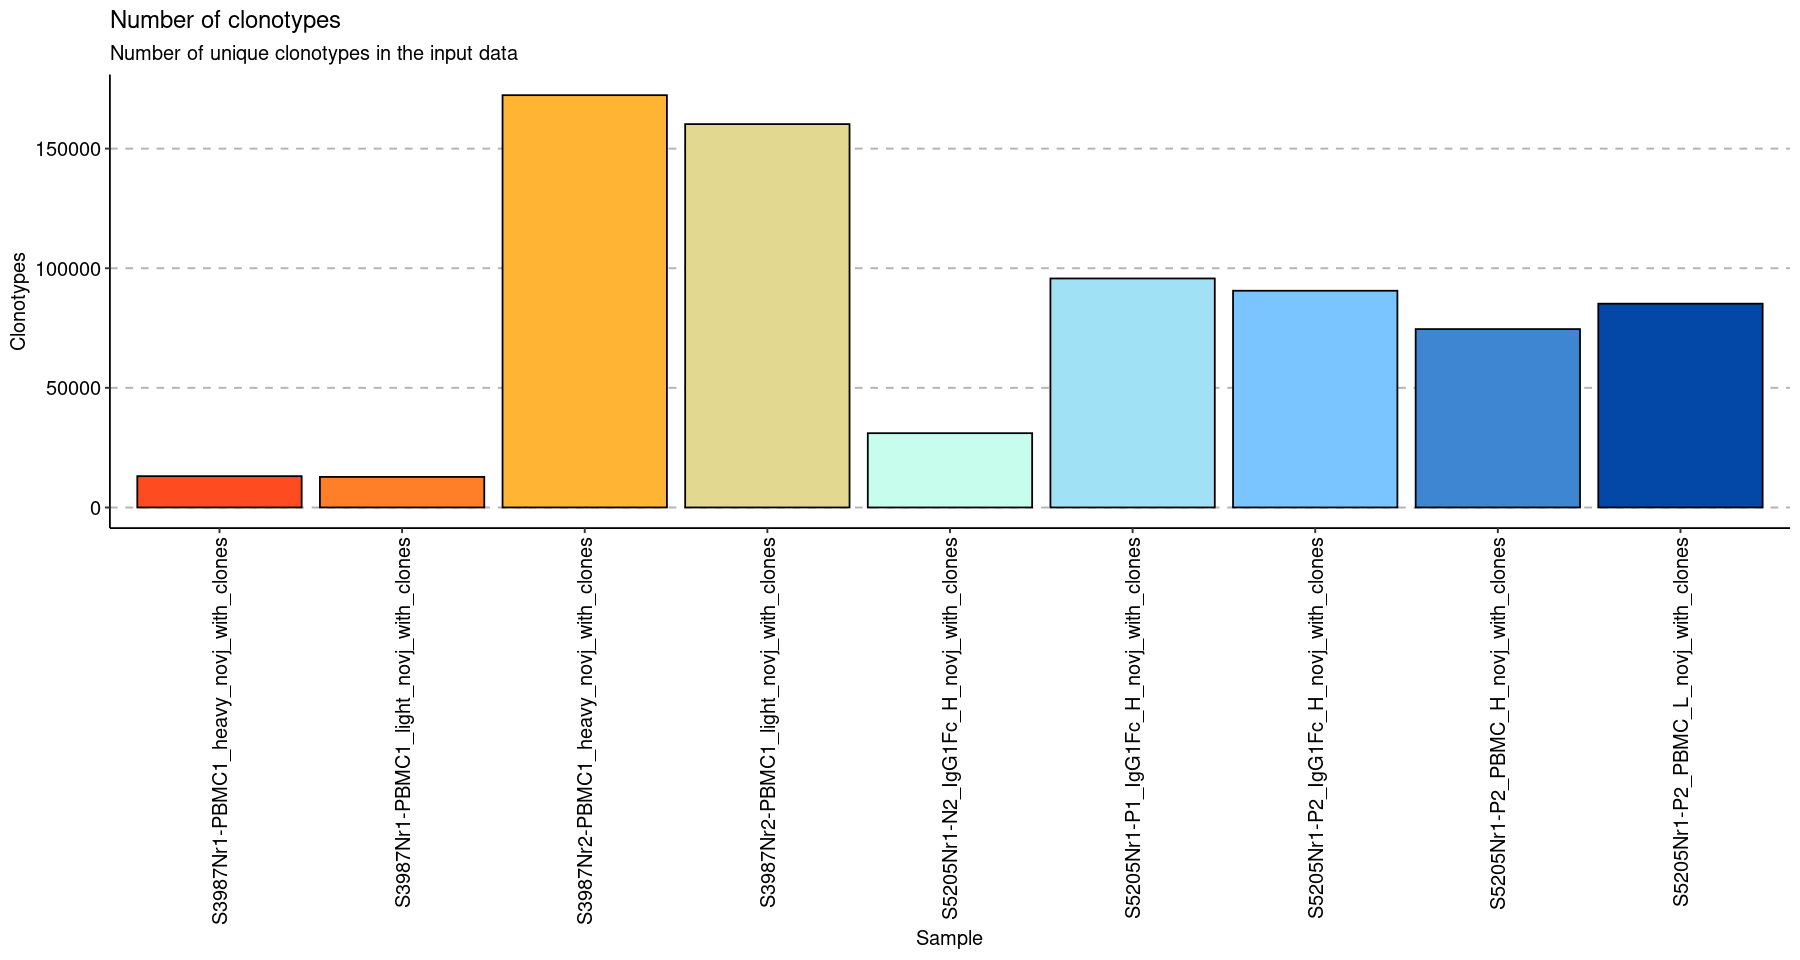

In [7]:
explorer_vol = repExplore(repertoires$data, .method = "volume")
explorer_len = repExplore(repertoires$data, .method = "len", .col = "aa")
explorer_cnt = repExplore(repertoires$data, .method = "count")

explorer_vol_vis = vis(explorer_vol)
explorer_len_vis = vis(explorer_len)
explorer_cnt_vis = vis(explorer_cnt)

explorer_vol_vis

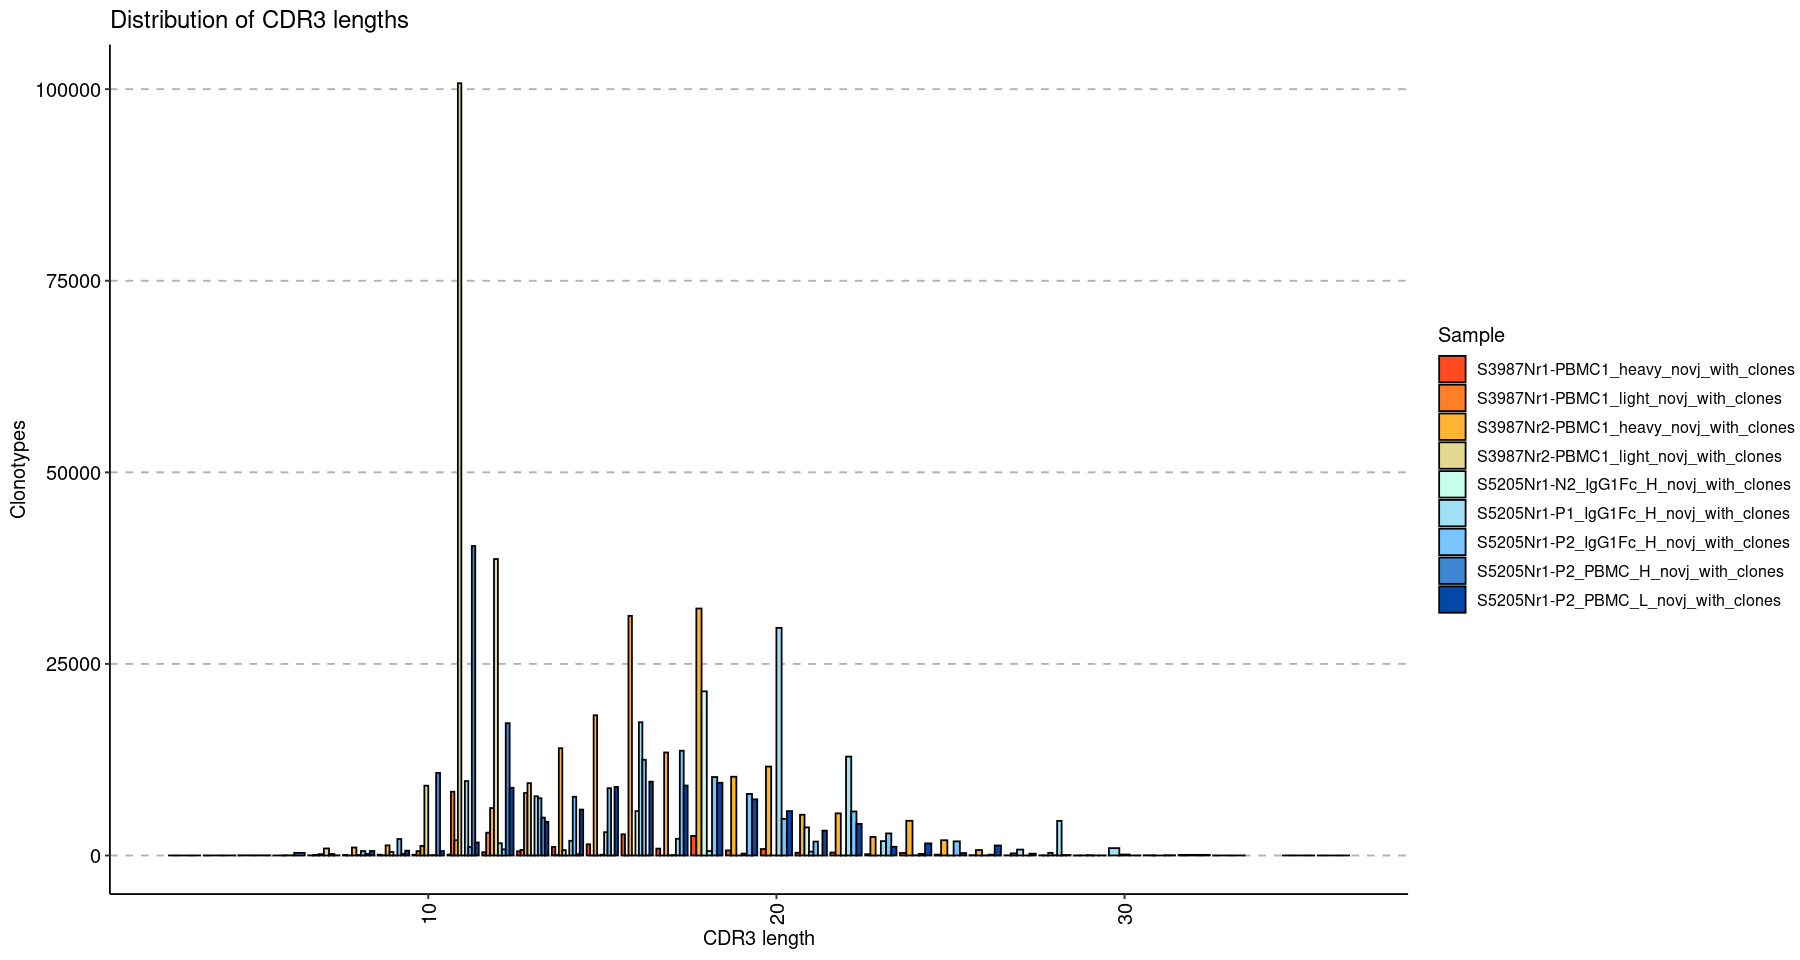

In [8]:
explorer_len_vis

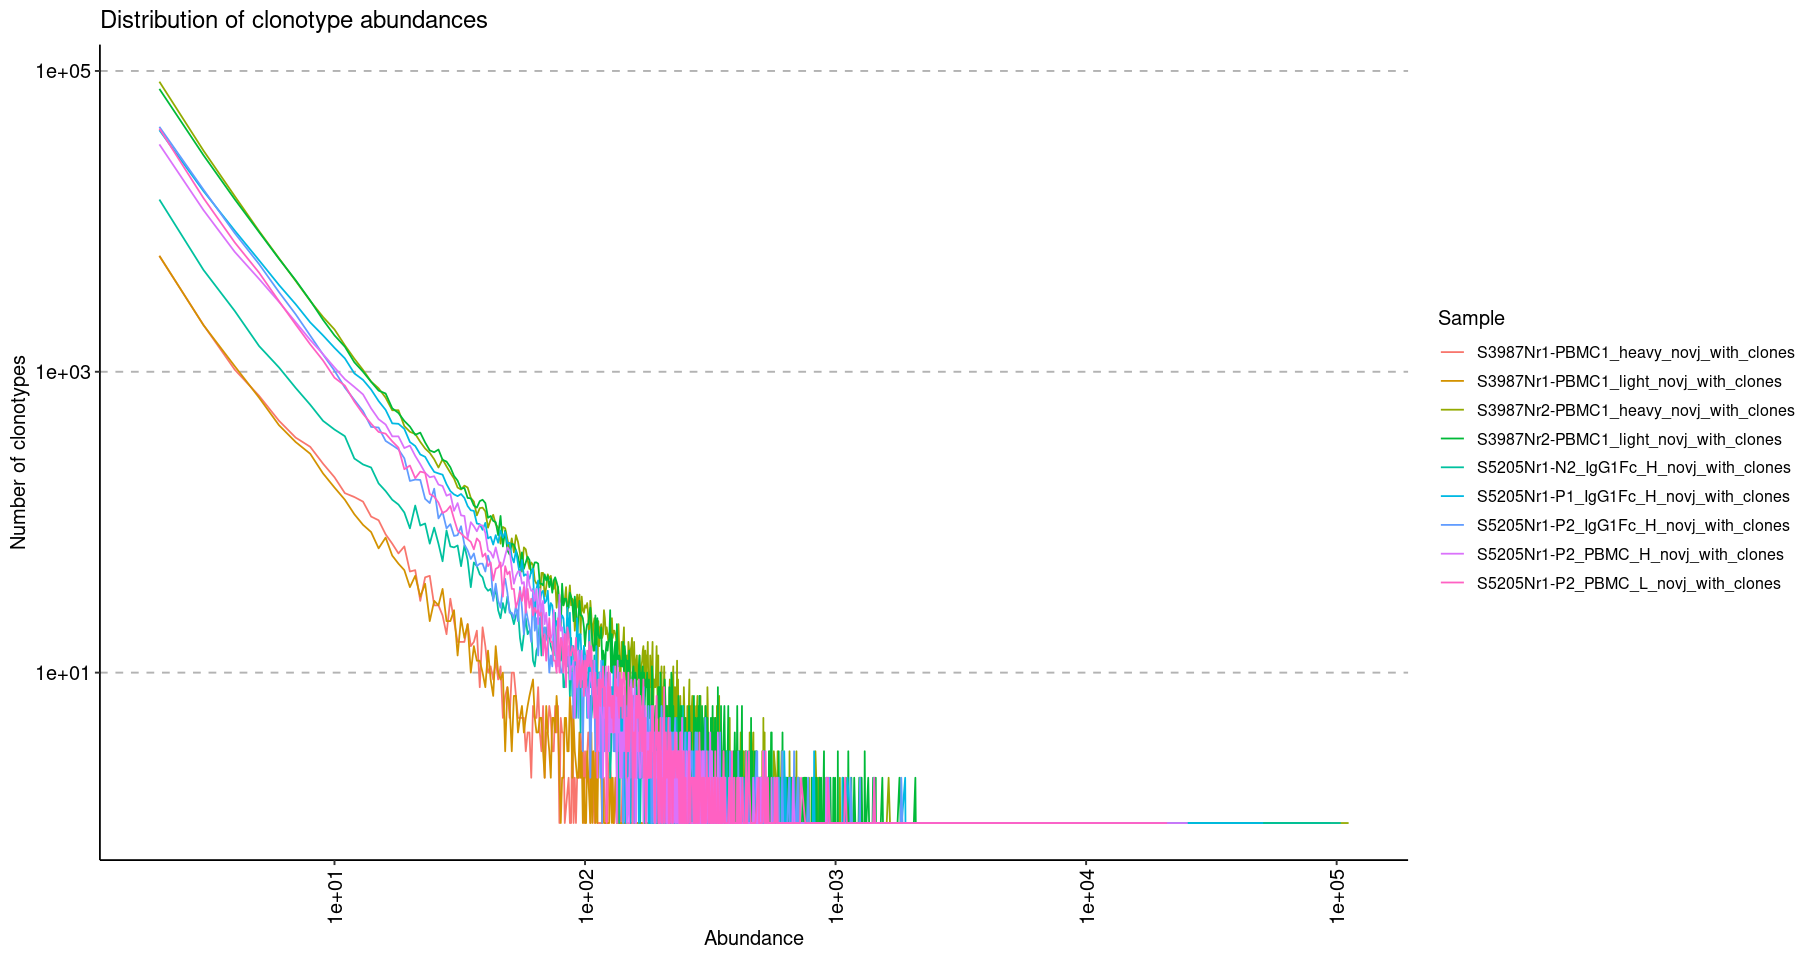

In [9]:
explorer_cnt_vis

Clonality

In [10]:
imm_pr <- repClonality(
    repertoires$data, 
    .method = "clonal.prop"
)
imm_top <- repClonality(
    repertoires$data, 
    .method = "top", 
    .head = c(10, 100, 1000, 3000, 10000)
)
imm_rare <- repClonality(
    repertoires$data, 
    .method = "rare"
)
imm_hom <- repClonality(
    repertoires$data,
    .method = "homeo",
    .clone.types = c(
        Small = .0001, 
        Medium = .001, 
        Large = .01, 
        Hyperexpanded = 1
    )
)

Using Sample as id variables



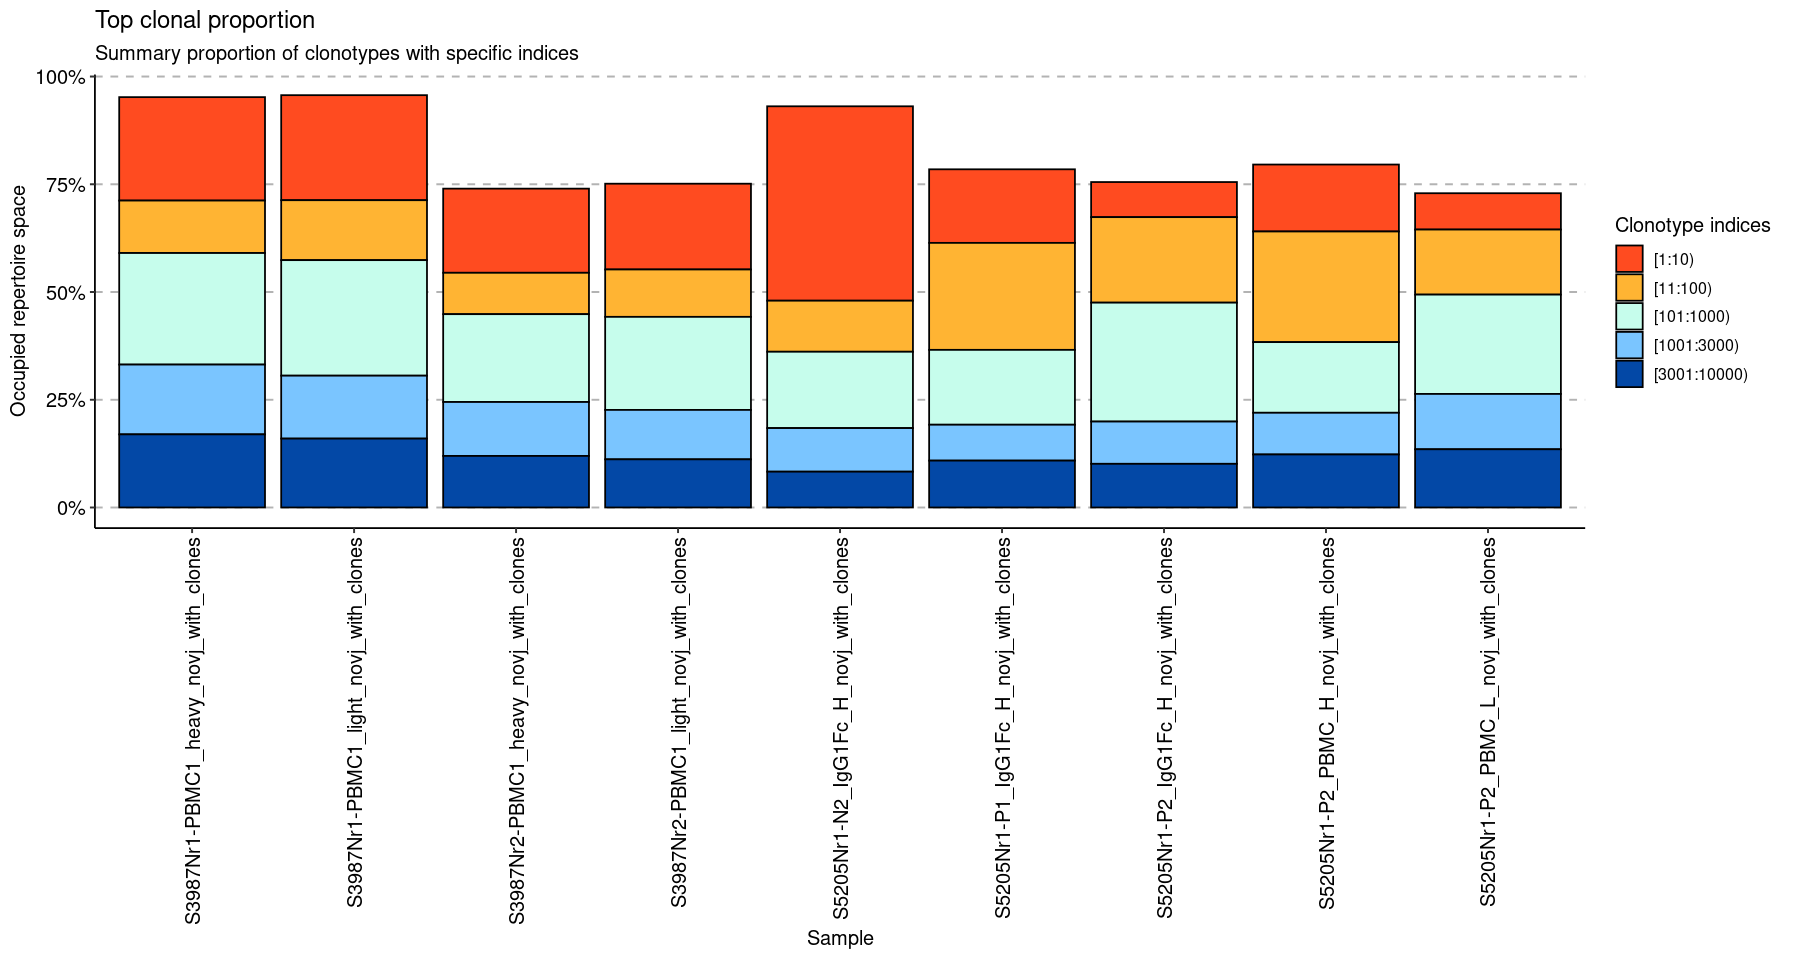

In [11]:
vis(imm_top)# + vis(imm_top, .by = "Status", .meta = immdata$meta)

Using Sample as id variables



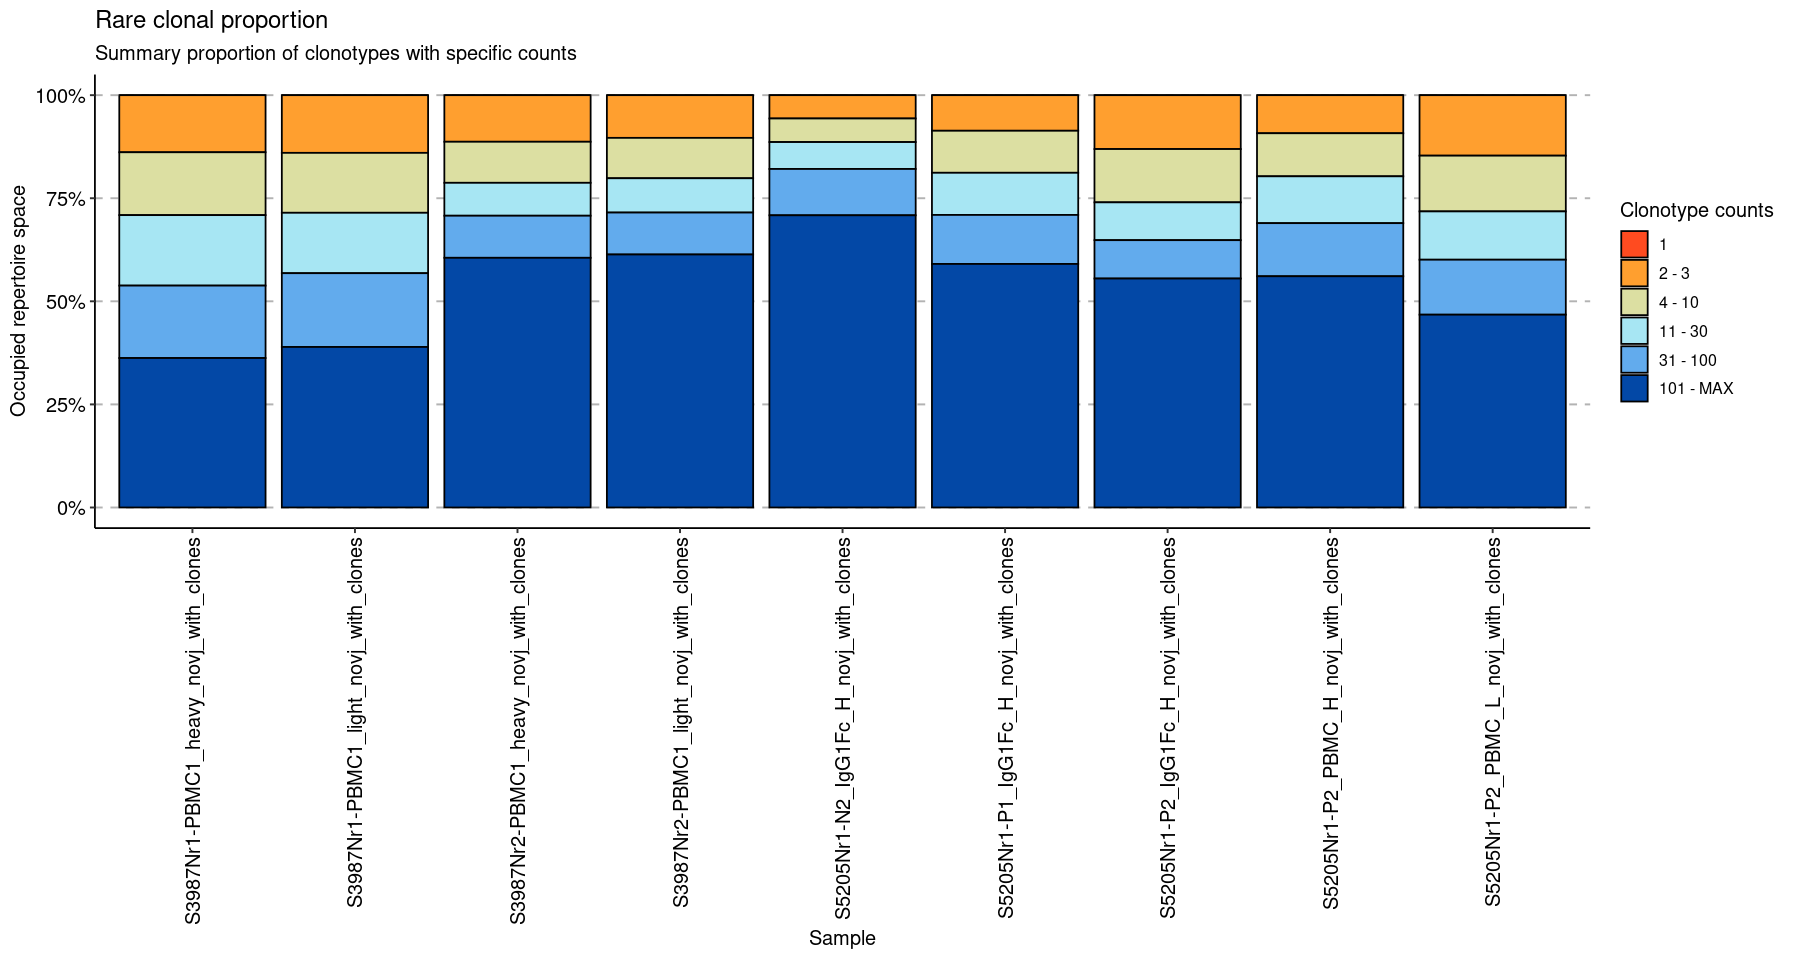

In [12]:
vis(imm_rare)

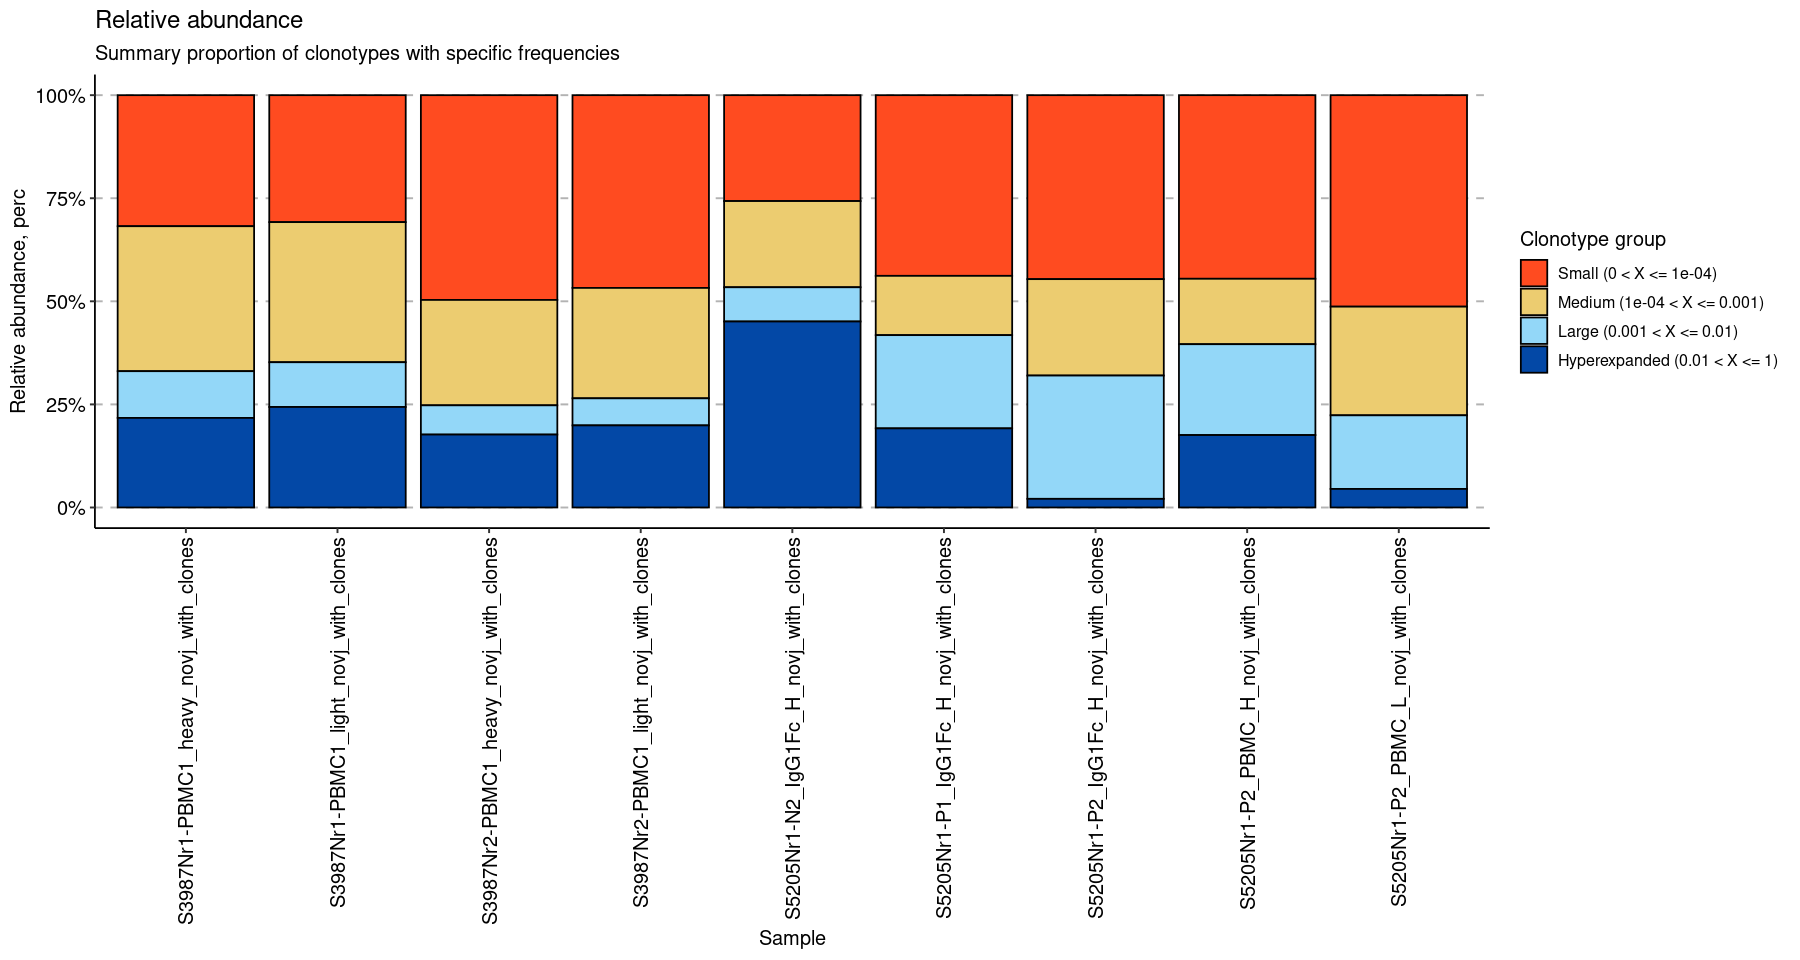

In [13]:
vis(imm_hom)

Repertoire overlaps and public repertoires

In [14]:
# Add repertoire of public RFs by Falkenburg's dataset
repertoires_with_rfs = repLoad(.path = c(paths, config[["public_rfs"]][["falkenburg_hchains_airr_path"]]))


== Step 1/3: loading repertoire files... ==


Processing "<initial>" ...

  -- [1/10] Parsing "/data/samples/AIRR-Seq/OURS/S3987Nr1/S3987Nr1-PBMC1_heavy/clones/S3987Nr1-PBMC1_heavy_novj_with_clones.tsv" -- 
airr

  -- [2/10] Parsing "/data/samples/AIRR-Seq/OURS/S3987Nr1/S3987Nr1-PBMC1_light/clones/S3987Nr1-PBMC1_light_novj_with_clones.tsv" -- 
airr

  -- [3/10] Parsing "/data/samples/AIRR-Seq/OURS/S3987Nr2/S3987Nr2-PBMC1_heavy/clones/S3987Nr2-PBMC1_heavy_novj_with_clones.tsv" -- 
airr

  -- [4/10] Parsing "/data/samples/AIRR-Seq/OURS/S3987Nr2/S3987Nr2-PBMC1_light/clones/S3987Nr2-PBMC1_light_novj_with_clones.tsv" -- 
airr

  -- [5/10] Parsing "/data/samples/AIRR-Seq/OURS/S5205Nr1/S5205Nr1-N2_IgG1Fc_H/clones/S5205Nr1-N2_IgG1Fc_H_novj_with_clones.tsv" -- 
airr

  -- [6/10] Parsing "/data/samples/AIRR-Seq/OURS/S5205Nr1/S5205Nr1-P1_IgG1Fc_H/clones/S5205Nr1-P1_IgG1Fc_H_novj_with_clones.tsv" -- 
airr

  -- [7/10] Parsing "/data/samples/AIRR-Seq/OURS/S5205Nr1/S5205Nr1-P2_IgG1Fc_H/clones/S5205

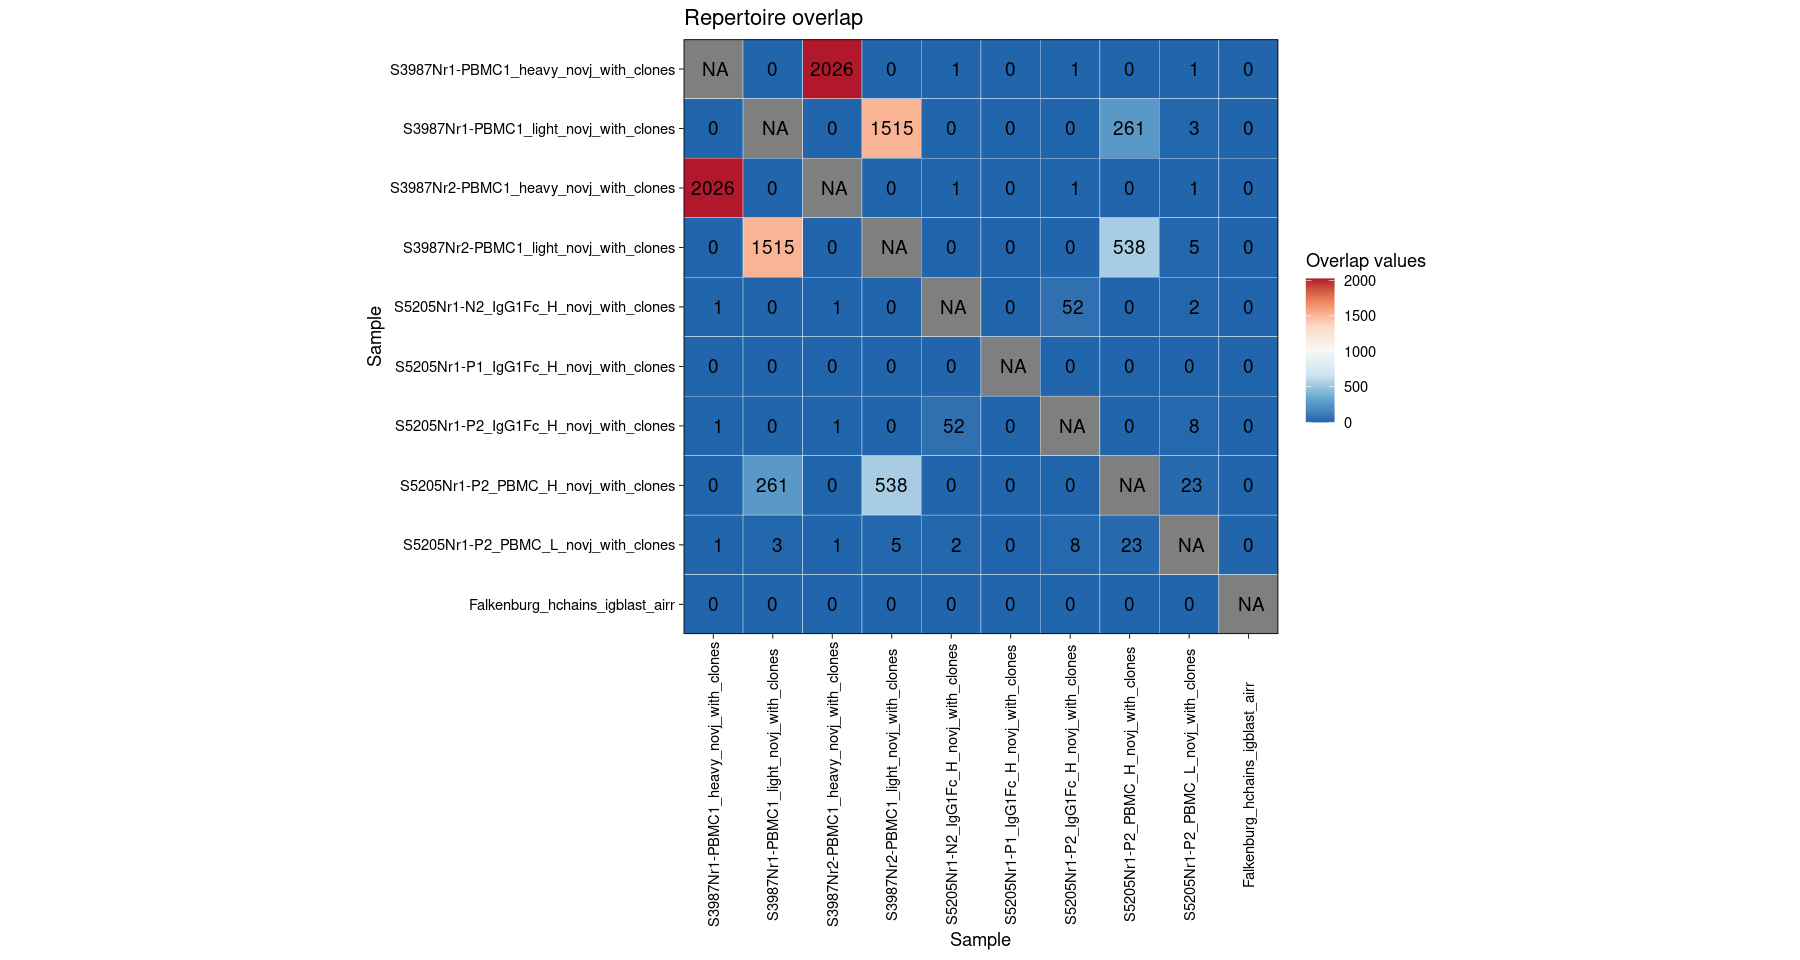

In [27]:
imm_ov1 <- repOverlap(repertoires_with_rfs$data, .method = "public", .verbose = F, .col="aa+v")
imm_ovl_vis <- vis(imm_ov1)
imm_ovl_vis

Diversity

In [16]:
# Compute statistics and visualise them
# Chao1 diversity measure
# div_chao <- repDiversity(repertoires$data, "chao1")

# Hill numbers
div_hill <- repDiversity(repertoires$data, "hill")
div_hill_vis <- vis(div_hill)

# D50
div_d50 <- repDiversity(repertoires$data, "d50")
div_d50_vis <- vis(div_d50)

# Ecological diversity measure
div_div <- repDiversity(repertoires$data, "div")
div_div_vis <- vis(div_div)

# Rarefaction analysis
# imm_raref <- repDiversity(repertoires$data, "raref", .verbose = FALSE)
# imm_raref_vis <- vis(imm_raref)

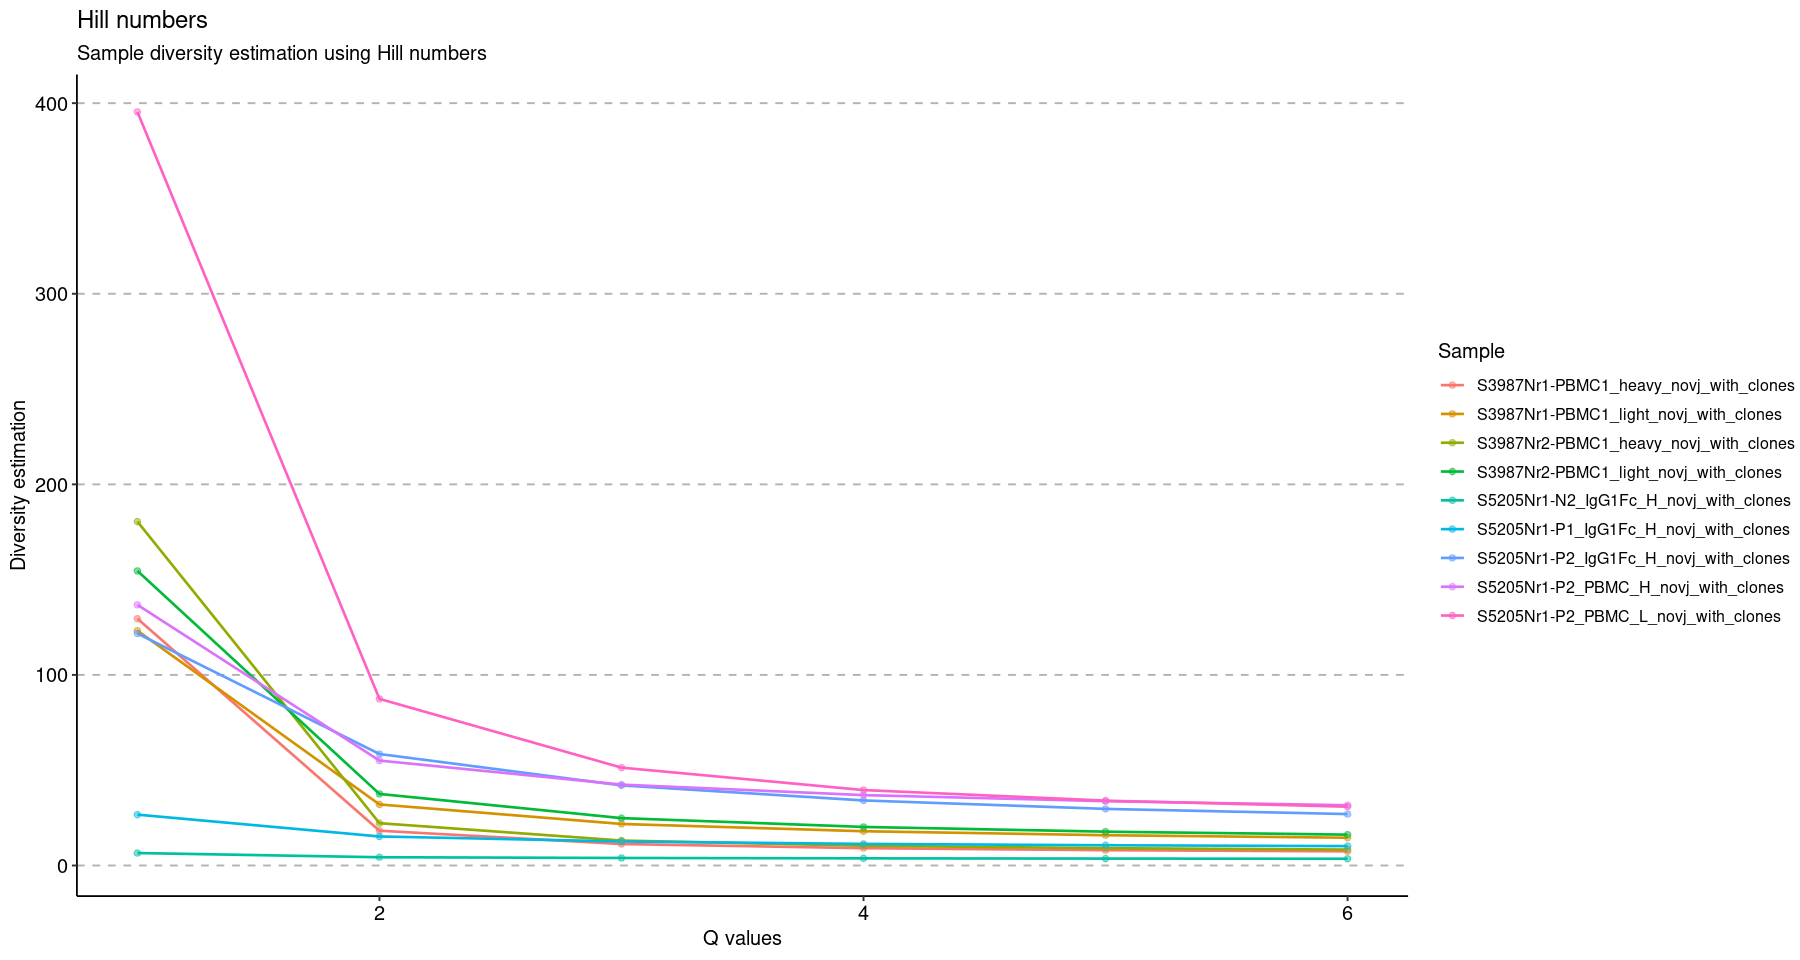

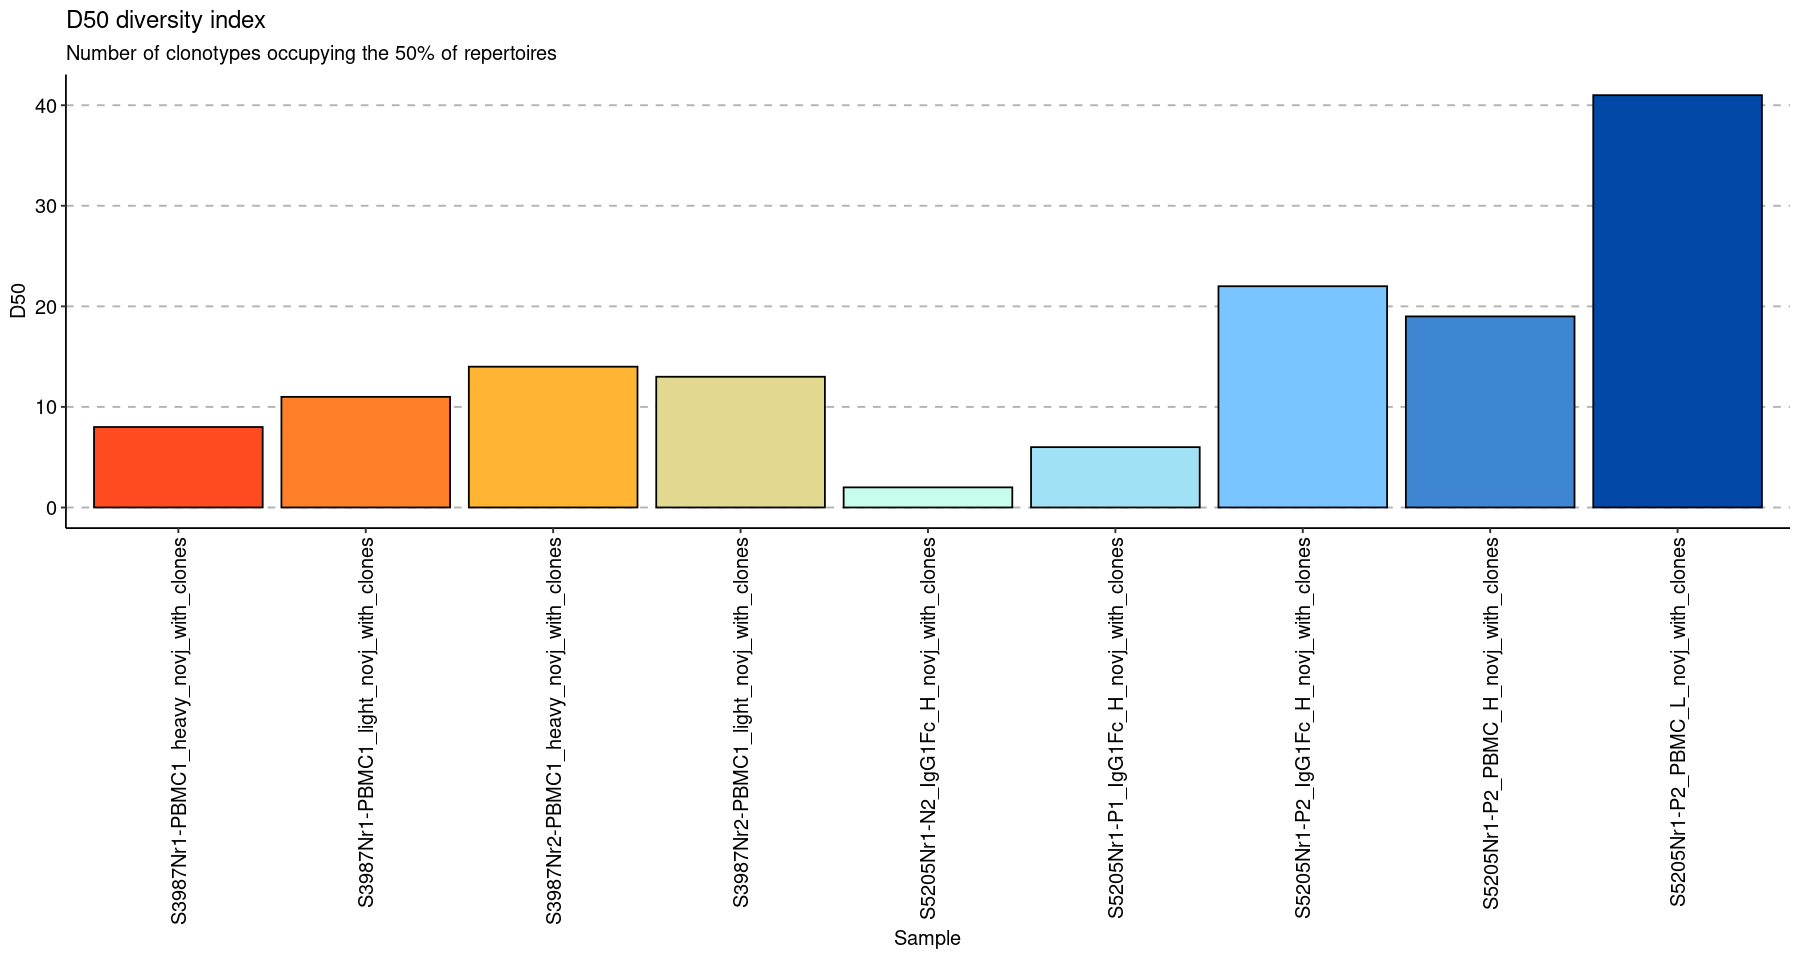

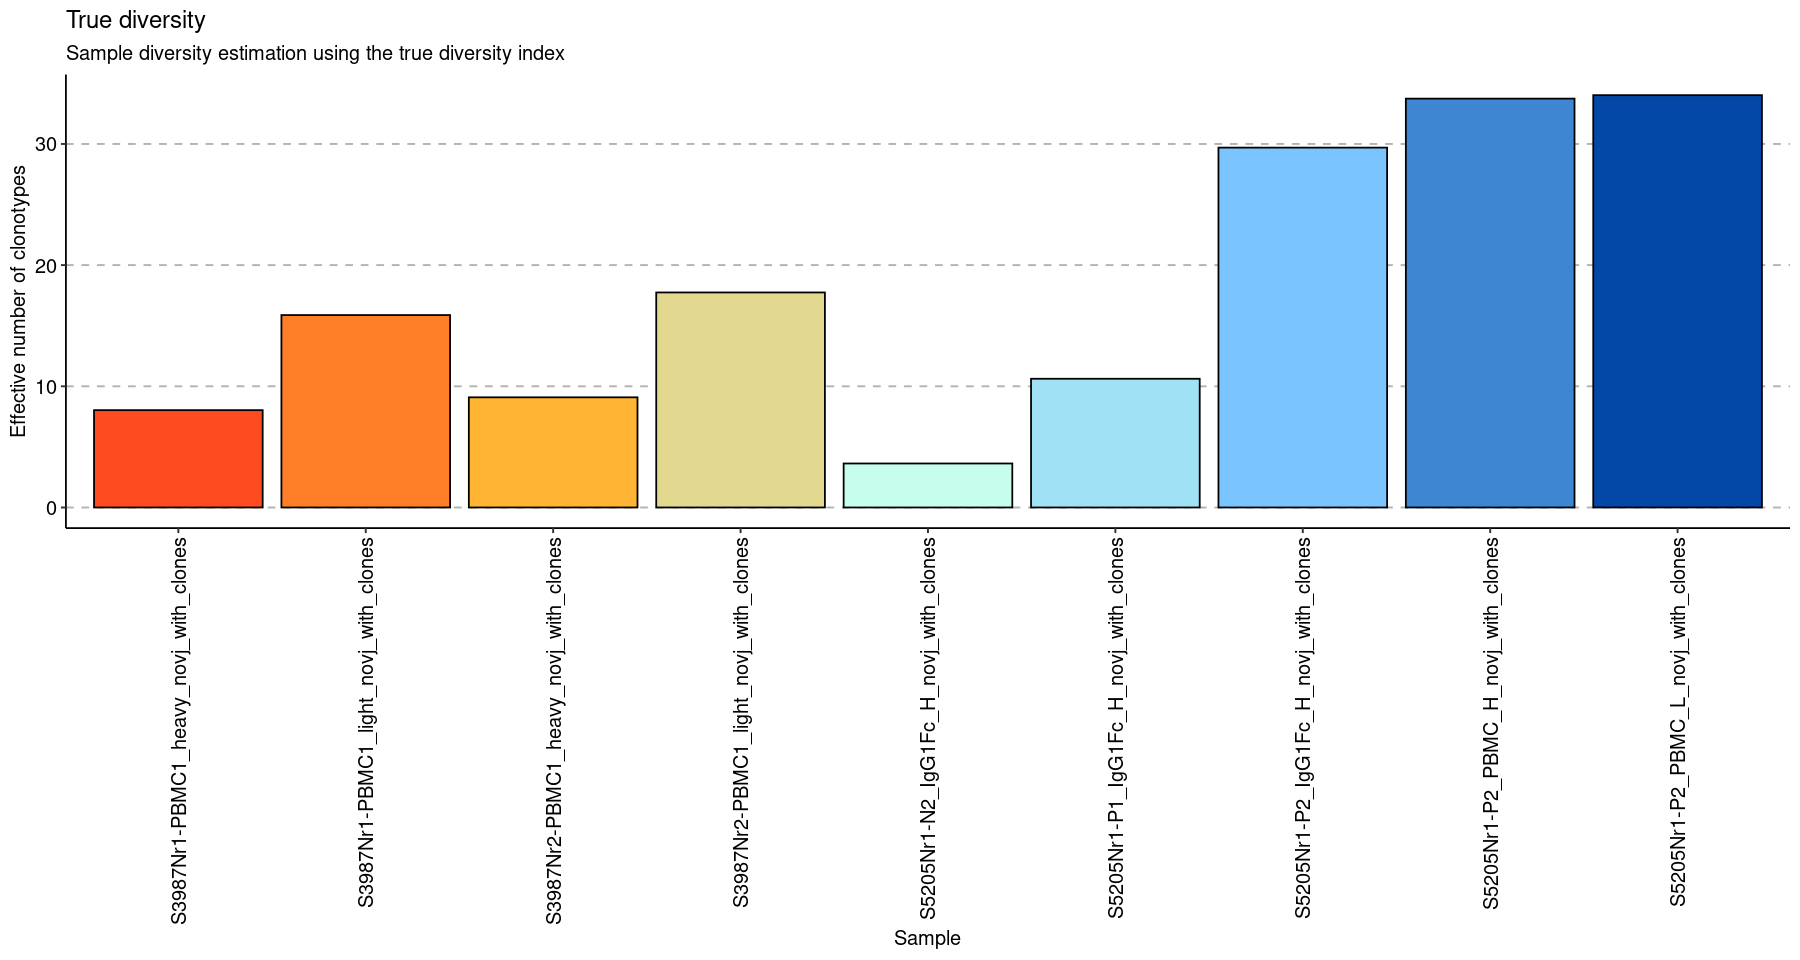

In [17]:
div_hill_vis
div_d50_vis
div_div_vis

Clonotype tracking - not performed, since no significant overlaps of interest

-

Annotation using immune receptor databases

- using the most popular AIRR databases
    - VDJDB: No BCRs
    - McPAS-TCR: No BCRs
    - PIRD TBAdb: BCRs and TCRs
        - Need download PIRD, unclear if possible
        - Contacted PIRD and immunearch authors

There are other databases (not suggested by immunarch), such as IEDB that can be later leveraged.

-

K-mer statistics

In [18]:
KMER_LEN = 5
kmers <- getKmers(repertoires$data, KMER_LEN)  # drops by default non-coding regions
kmers_vis <- vis(kmers)
kmers

Kmer,S3987Nr1-PBMC1_heavy_novj_with_clones,S3987Nr1-PBMC1_light_novj_with_clones,S3987Nr2-PBMC1_heavy_novj_with_clones,S3987Nr2-PBMC1_light_novj_with_clones,S5205Nr1-N2_IgG1Fc_H_novj_with_clones,S5205Nr1-P1_IgG1Fc_H_novj_with_clones,S5205Nr1-P2_IgG1Fc_H_novj_with_clones,S5205Nr1-P2_PBMC_H_novj_with_clones,S5205Nr1-P2_PBMC_L_novj_with_clones
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AAAAA,NA,NA,NA,NA,NA,NA,5,NA,40
AAAAD,NA,NA,NA,NA,NA,NA,1169,NA,40
AAAAF,NA,NA,NA,NA,1,NA,761,NA,NA
AAAAG,NA,NA,2,NA,NA,NA,4,NA,44
AAAAI,NA,NA,NA,NA,NA,NA,NA,NA,33
AAAAL,NA,NA,NA,NA,NA,NA,5,NA,NA
AAAAM,NA,NA,NA,NA,NA,NA,NA,NA,6
AAAAN,NA,NA,NA,NA,NA,NA,3,NA,NA
AAAAP,13,NA,249,NA,NA,NA,NA,NA,NA


Warning message:
“Removed 96 rows containing missing values (geom_bar).”


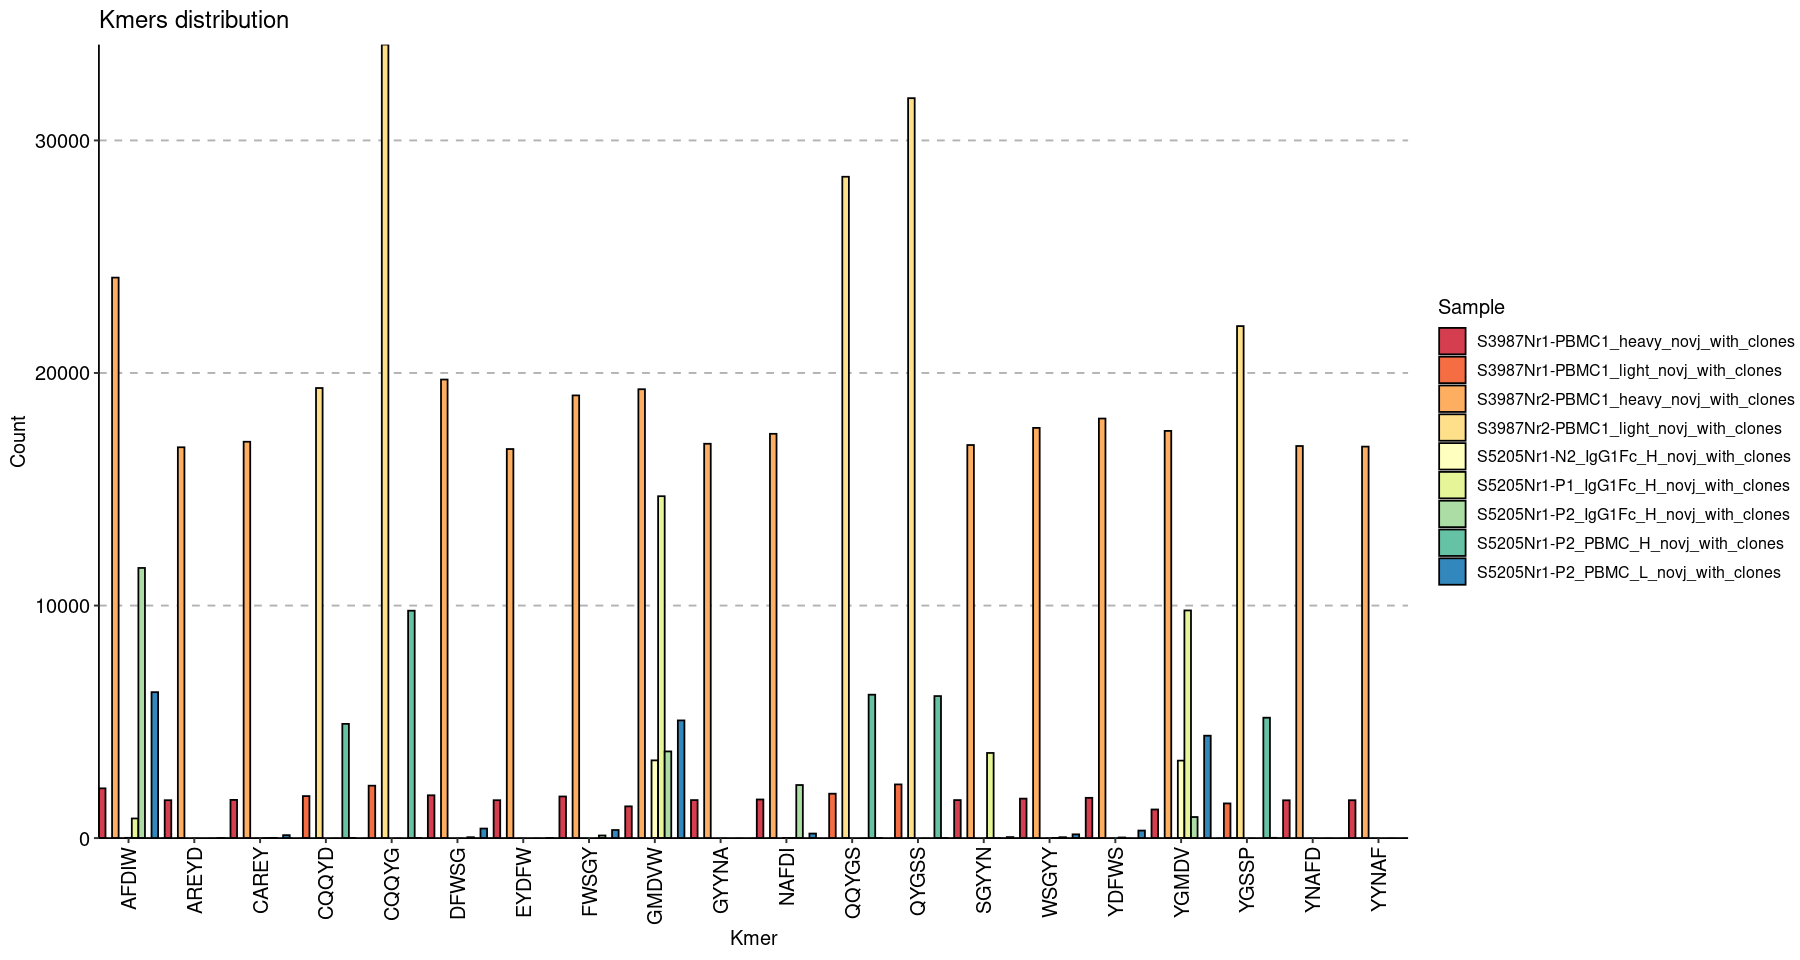

In [19]:
# vis(kmers, .head = 50, .position='stack')
# vis(kmers, .head = 50, .position='fill')
vis(kmers, .head = 20, .position='dodge')

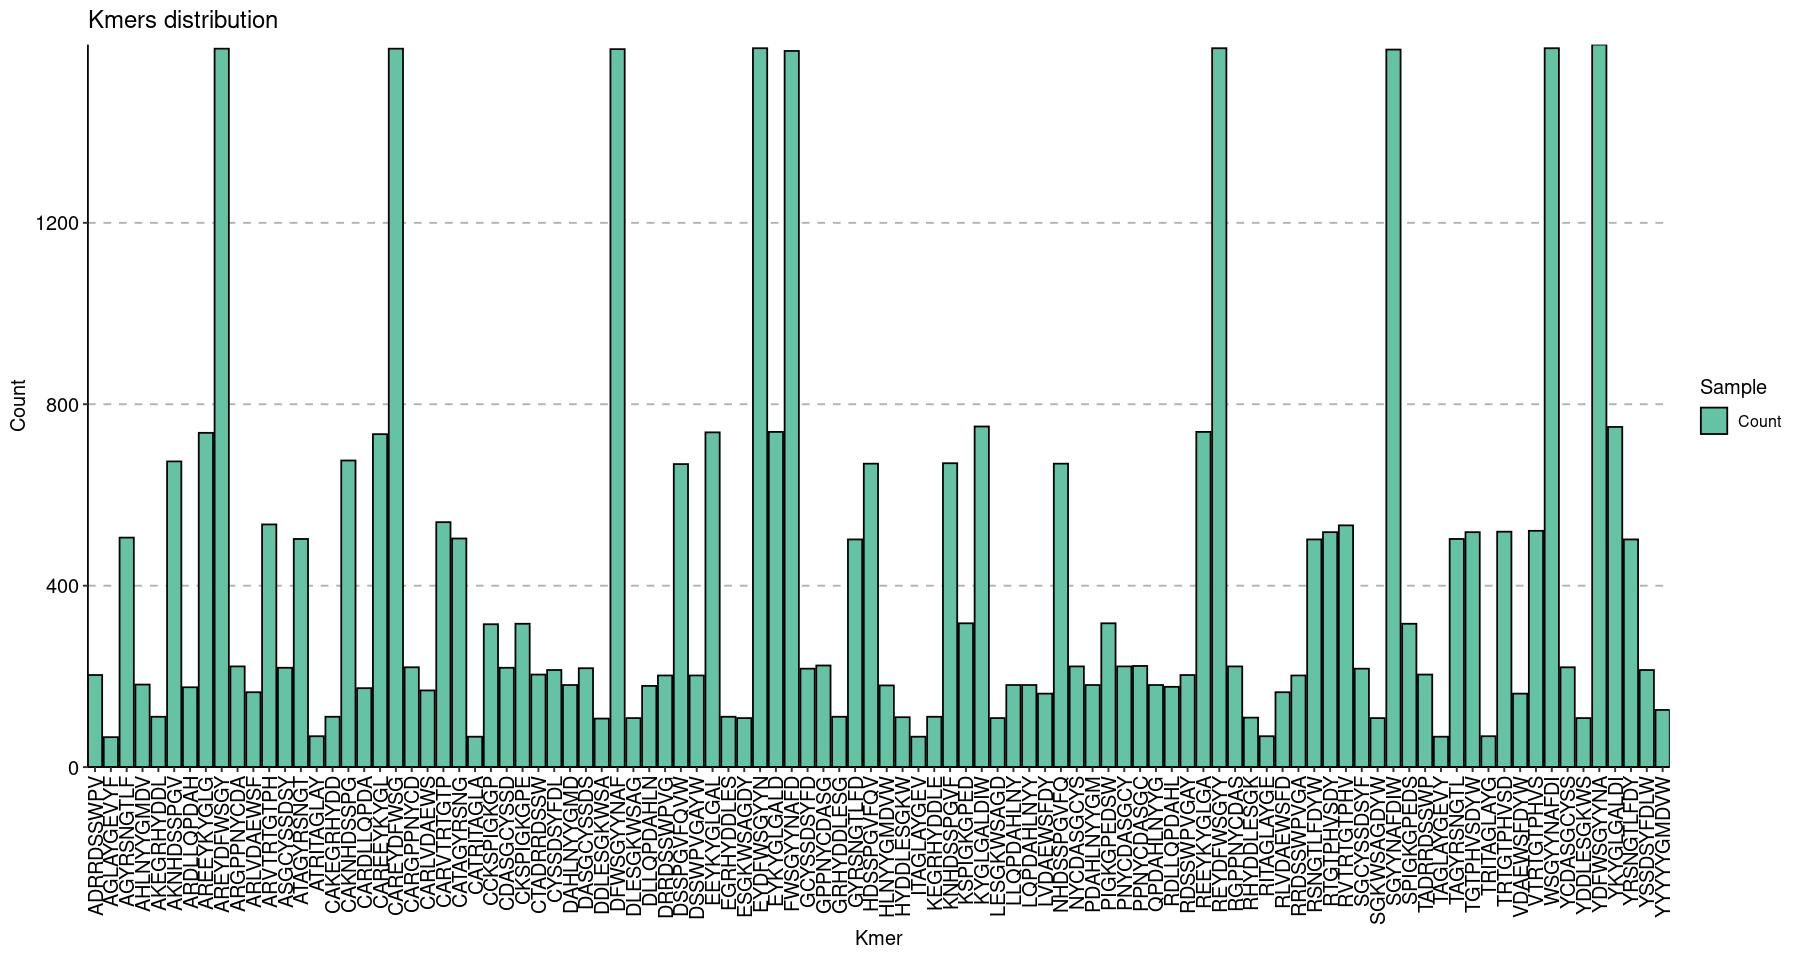

In [20]:
kmers <- getKmers(repertoires$data[[1]], 10)  # drops by default non-coding regions
kmers_vis <- vis(kmers)
kmers_vis

In [21]:
kp = kmer_profile(kmers, "freq")  # "prob", "wei", "self"
kp

Warning message in kmer_profile(kmers, "freq"):
“Warning: removed 10 non-amino acid symbol(s): A
Please make sure your data doesn't have them in the future.”


C,14276,1534,1279,1381,1425,1440,1302,1205,1108,828
D,7288,7955,8274,8854,6978,6674,3777,13837,13396,12633
E,4848,5030,5230,5689,2580,1707,1772,1681,1384,1265
F,2493,2755,3003,3084,3206,3245,10297,8478,8328,7915
G,6323,9803,12260,13363,14737,15135,14296,13108,11434,9385
H,1794,1880,2092,2146,2571,1858,1757,1599,1747,1661
I,1666,2153,2334,2422,2376,2096,1722,1472,4204,4008
K,4250,4338,4551,2098,2132,1877,1818,1005,605,509
L,2458,2899,3203,4274,3967,4041,4917,4613,4845,4458
M,469,579,600,706,659,520,2004,1911,1846,1758
N,1979,2153,3022,3334,4860,4852,4732,4473,4243,3489


Warning message:
“Removed 10 rows containing missing values (geom_point).”
Warning message:
“Removed 10 rows containing missing values (geom_label_repel).”
Warning message:
“ggrepel: 55 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


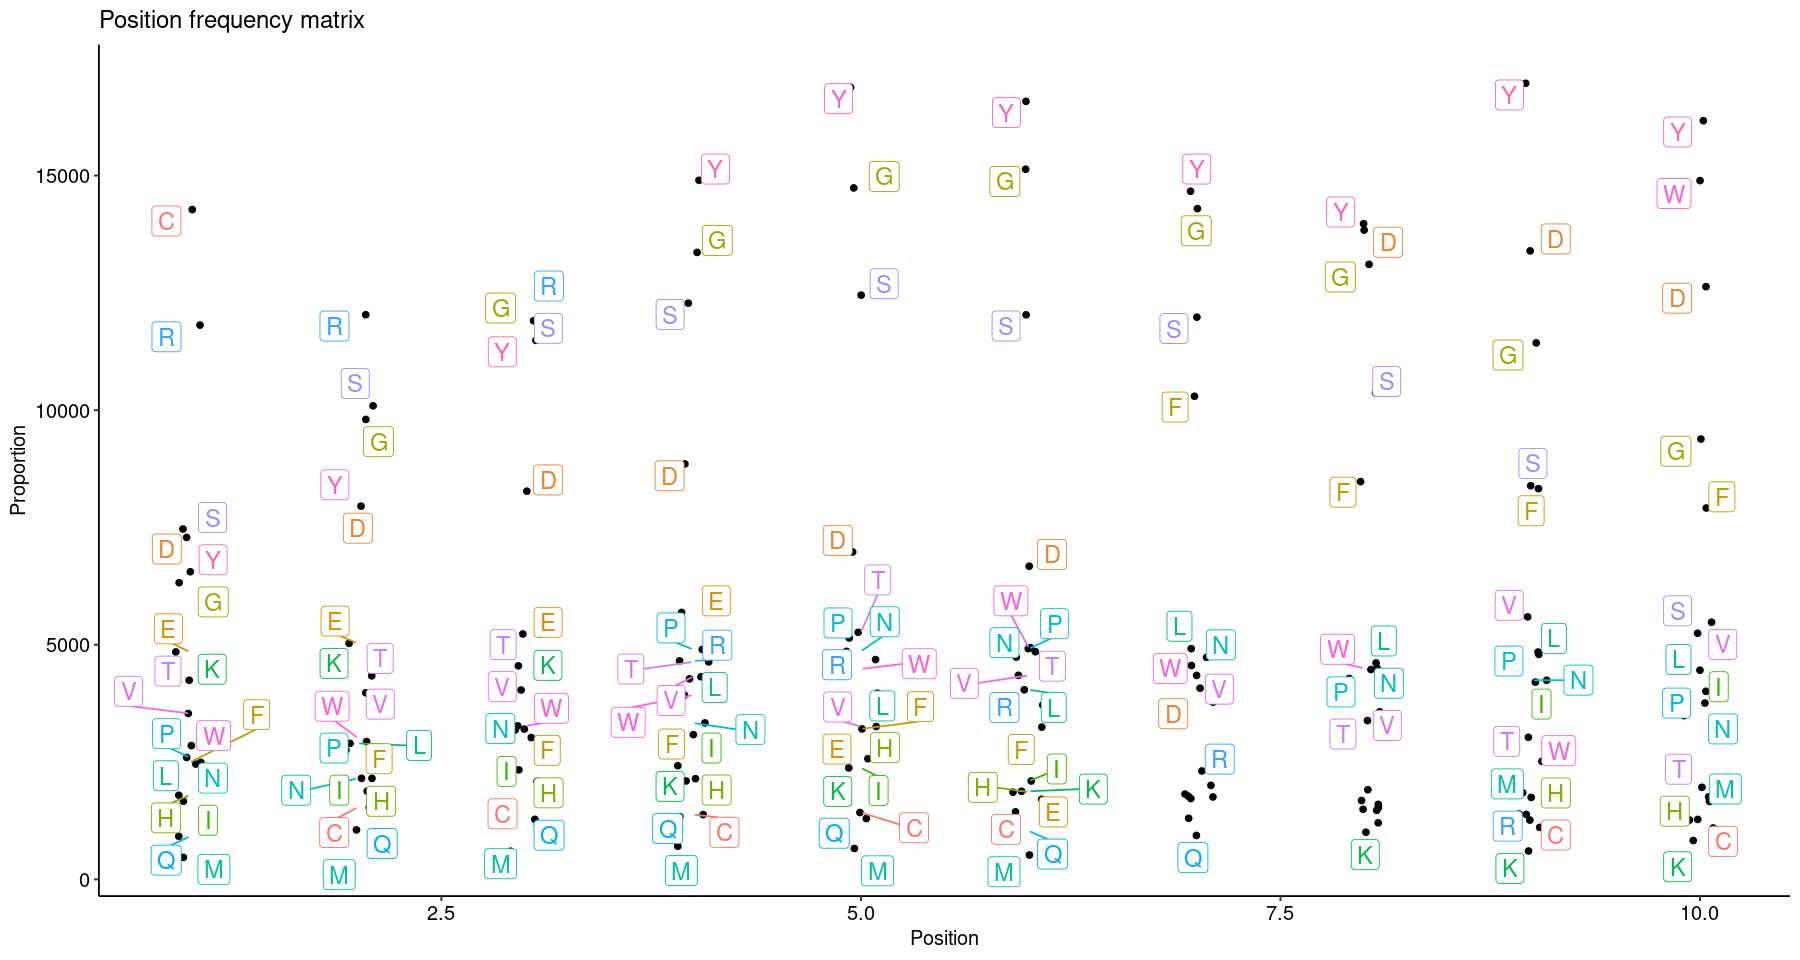

In [22]:
vis(kp)